# Final Project - Digital Signal Processing

### Guy Shafir - 315941799
### Tamar Entin - 210014411

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
from scipy import signal
import wave as wv

### Functions:

In [2]:
def FindAlpha(y, d):
    y_sum = []
    N = len(y) - d
    k = (N // d)+1
    for i in range(k):
        y_sum.insert(0, (-1)**(i) * y[(k-i)*d])
    p= np.sort(np.abs(np.roots((y_sum))))
    for root in p:
        if (round(root,3)/0.1%1) == 0:
            return root

In [3]:
def LMS(x, d, delta, N):
    N = N-1
    h = np.zeros(N)
    e = np.zeros(len(x))
    for n in range(N, len(x)):
        y = np.dot(h, x[n - N:n][::-1])
        e[n] = d[n] - y
        h = h + 2 * delta * e[n] * x[n - N:n][::-1]
    y = signal.lfilter(h,1,x)
    return h, y

In [4]:
def LmsDelay(s, w, N, M, D, delta):
    x = s + w
    h = np.zeros(N)
    e = np.zeros(M)
    s_hat = np.zeros(M)
    for n in range(M):
        x_d = np.zeros(N)
        for k in range(N):
            x_d[k] = x[n - k - D]
        y = np.dot(h, x_d)
        e[n] = x[n] - y
        h = h + delta * e[n] * x_d
        s_hat[n] = y
    return s_hat, h

In [5]:
def PlotEstOldSignal(input_signal, og_signal, est_signal, n):

    plt.figure(figsize=(15,10))
    axis = plt.subplot(311)
    plt.plot(n, og_signal, color='blue')
    plt.title('Original Signal')
    plt.subplot(312)
    plt.plot(n, est_signal, color='red')
    plt.title('Estimited Signal')
    plt.subplot(313)
    plt.plot(n, input_signal, color='green')
    plt.title('Input Signal')
   
    plt.show()

In [6]:
def SignalPlt(old_signal, new_signal, y_correlation, d):

    plt.figure(figsize=(15,10))
    axis = plt.subplot(232)
    plt.plot(x_new, new_signal, color='yellow')
    plt.xlim(-0.1, t_time)
    plt.title('Filterd Signal')
    plt.subplot(231)
    plt.plot(x_old, old_signal, color='green')
    plt.title('Original Signal')
    plt.xlim(-0.1, t_time)

    plt.subplot(233)
    plt.plot(x_new, new_signal, color='blue')
    plt.plot(x_old, old_signal, color='red')
    plt.title('The difference Between Original and Filtered Signals')
    plt.xlim(-0.1, t_time)


    plt.subplot(234)
    plt.plot(x_new[:-1], y_correlation, color='blue')
    plt.title('Auto Correlation with Zero')
    plt.xlim(-0.1, t_time)
    r = d
    plt.subplot(235)
    plt.plot(x_new[d//2:-1], y_correlation[d//2:], color='blue')
    plt.title('Auto Correlation without Zero')
    plt.xlim(-0.1, t_time)

    
    plt.show()

### Code:

In [7]:
record = wv.open("chiquitita.wav", 'rb')
rate = record.getframerate()
smaples_of_numbers = record.getnframes()
frames = record.readframes(-1)
frames = np.frombuffer(frames, dtype=np.int32)
alpha = 0.7
delay = int(3*rate)
n = frames.shape[0]
# Creating new sound
y = np.zeros((frames.shape[0]+delay))
y[:delay] = frames[:delay]
i = delay
while i < n + delay:
    if i < n:
        y[i] = frames[i] + alpha * frames[i - delay]
    else:
        y[i] = alpha * frames[i - delay]
    i += 1

t_time = smaples_of_numbers / rate
x_old = np.linspace(0, t_time, num=record.getnframes())
x_new = np.linspace(0, t_time, num=len(y))

Delay in Frames is: 896
Delay in seconds is: 0


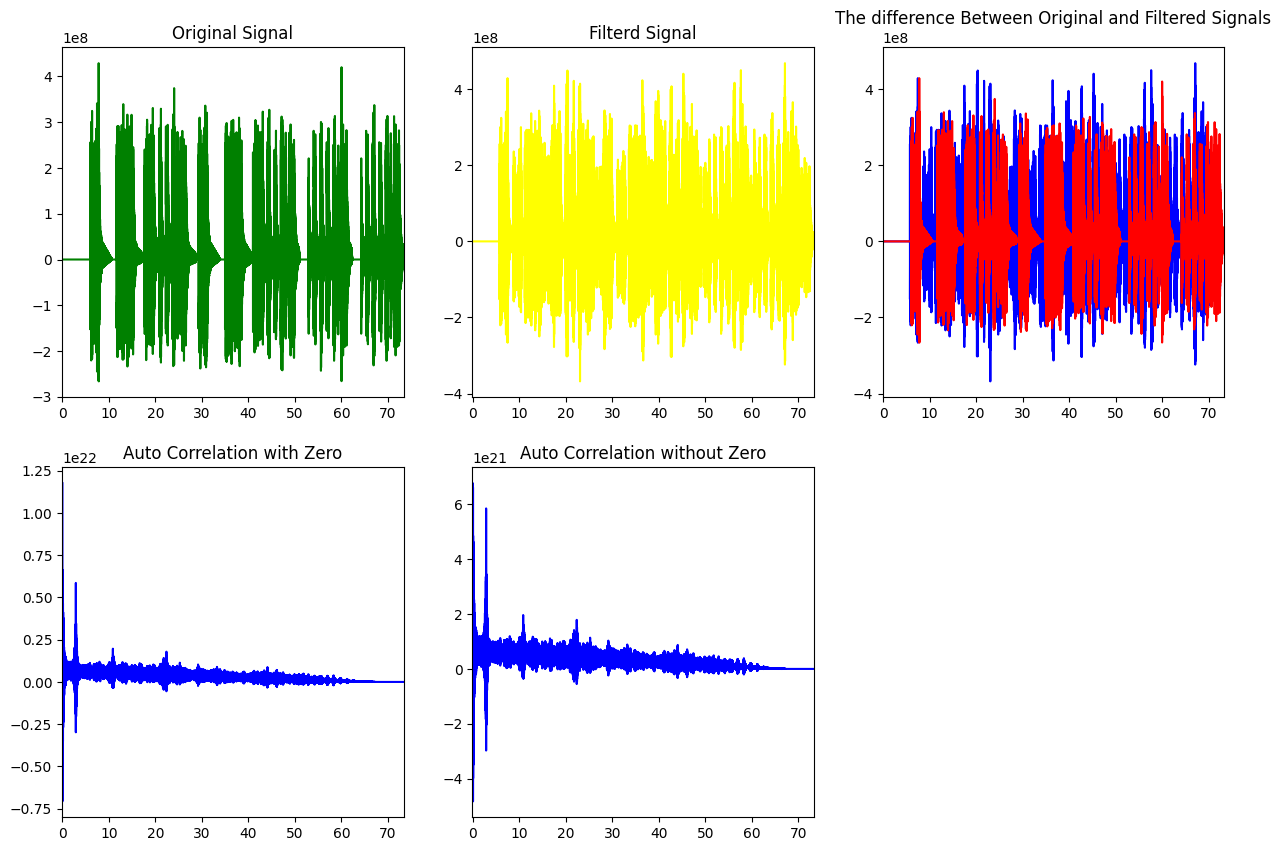

In [8]:
y_correlation = sps.correlate(y,y, method='fft', mode='full')[len(y):]
d = 0
function_step = 0
while d == 0:
    function_step += 1
    d = np.argmax(y_correlation[function_step*10:])    
d = d + 1 + function_step*10
print(f"Delay in Frames is: {d}")
print(f"Delay in seconds is: {d//rate}")
SignalPlt(frames, y, y_correlation, d)

In [9]:
# Find Alpha
est_alpha = FindAlpha(y,d)
print(f"Estimited alpha is: {round(alpha, 2)}")

Estimited alpha is: 0.7


In [10]:
# LMS
x_len = 100
x = np.random.rand(x_len)
d = signal.lfilter([1], [1], x) + 0.01 * np.random.randn(x_len)
delta = 0.01
N = 10

h, y = LMS(x, d, delta, N)
print("h is: ", h , "\ny is: ", y)

h is:  [0.10959007 0.09898127 0.09948763 0.11710028 0.11906974 0.12547873
 0.08525258 0.09833177 0.0963356 ] 
y is:  [0.02393334 0.11072961 0.10275755 0.12625901 0.16895059 0.26938733
 0.36150425 0.33144954 0.3946924  0.47895461 0.4006695  0.38518161
 0.45744214 0.50551043 0.44826413 0.42183176 0.50707685 0.54870618
 0.51787517 0.60166069 0.68996837 0.67524852 0.61583903 0.58625001
 0.57508797 0.51219435 0.48166049 0.40557094 0.34533003 0.34793662
 0.30943168 0.38345315 0.40995449 0.39287871 0.44311529 0.44503708
 0.51690423 0.53866023 0.47515127 0.48597947 0.48847666 0.50773646
 0.53990718 0.49504871 0.46738185 0.47210941 0.44643415 0.52885783
 0.50946921 0.51883236 0.47796711 0.45404898 0.44963194 0.50688629
 0.52028109 0.45254903 0.40449221 0.37494515 0.35202195 0.41545658
 0.33600025 0.36734831 0.36341506 0.36168237 0.39330088 0.41637501
 0.47828015 0.5142372  0.45357804 0.51068151 0.52455167 0.54382355
 0.50188896 0.47256595 0.42121112 0.45426547 0.42362002 0.44441027
 0.47040444 

In [11]:
# LMS Delay
N = 11
M = 1000
n = np.arange(M)
s = np.sin(np.pi / 5 * np.arange(M))
w = np.random.normal(0, 0.2, M)
x = s + w
s_hat, h = LmsDelay(s, w, 11, 1000, 1, 0.05)

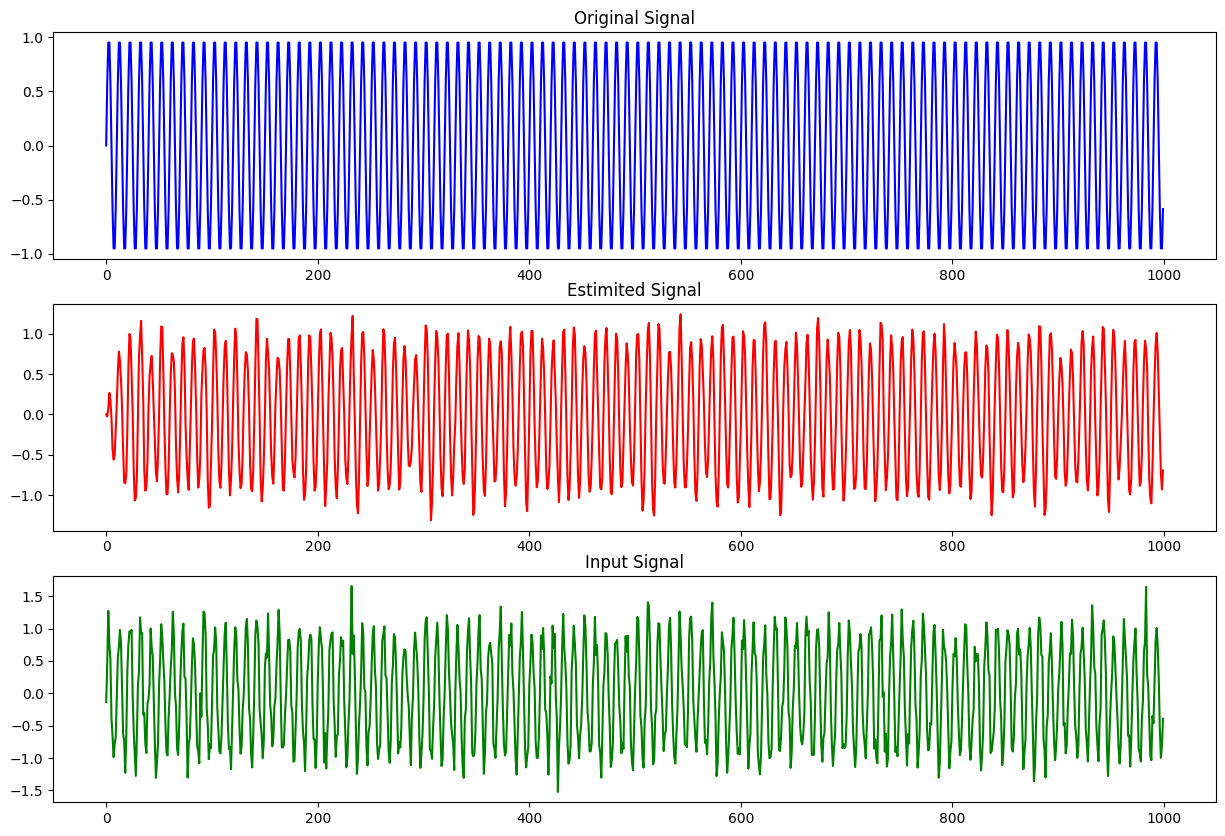

In [12]:
# PlotEstOldSignal
PlotEstOldSignal(x, s, s_hat, n)